# Pandas 기초

In [1]:
import pandas as pd

In [20]:
casts = pd.read_csv('./pythondsp-pandasguide-b936c3b43406/data/cast.csv',
                    index_col=None, encoding='utf-8')
casts.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


## Unstack

* 10년 주기로 영화를 그룹화

In [4]:
c = casts
c.groupby([c['year']//10*10, 'type']).size().head(8)

year  type   
1910  actor       384
      actress     285
1920  actor       710
      actress     411
1930  actor      2628
      actress     820
1940  actor      3014
      actress     983
dtype: int64

* 유형에 따라 데이터를 그룹화

In [5]:
c = casts
c_decade = c.groupby(['type', c['year']//10*10]).size()
c_decade

type     year
actor    1910      384
         1920      710
         1930     2628
         1940     3014
         1950     2877
         1960     2775
         1970     3044
         1980     3565
         1990     5108
         2000    10368
         2010    15523
         2020        4
actress  1910      285
         1920      411
         1930      820
         1940      983
         1950     1015
         1960      968
         1970     1299
         1980     1989
         1990     2544
         2000     5831
         2010     8853
         2020        3
dtype: int64

* unstack 으로 새로운 dataframe 생성

In [6]:
c_decade.unstack()

year,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
type,,,,,,,,,,,,
actor,384,710,2628,3014,2877,2775,3044,3565,5108,10368,15523,4
actress,285,411,820,983,1015,968,1299,1989,2544,5831,8853,3


In [7]:
import matplotlib.pyplot as plt

In [8]:
c_decade.unstack().plot()

/Users/jinho/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='type'>

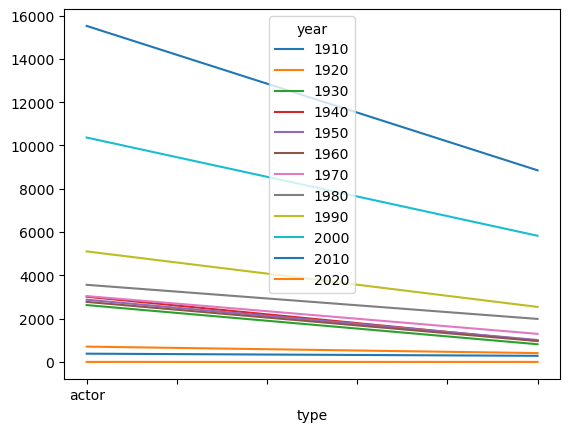

In [9]:
plt.show()

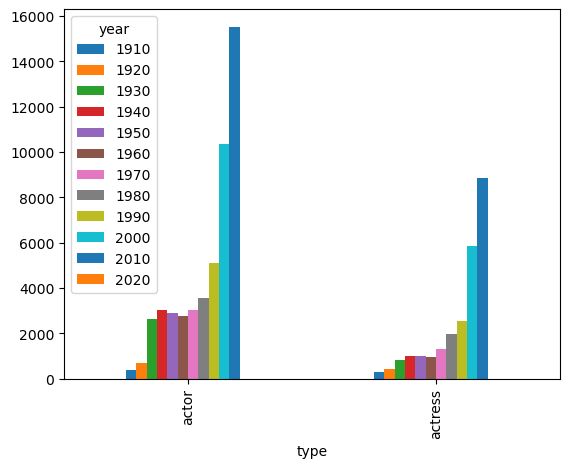

In [12]:
c_decade.unstack().plot(kind='bar')
plt.show()

* 데이터를 나란히 표시하기 위해 unstack(0) 사용

In [13]:
c_decade.unstack(0)

type,actor,actress
year,,
1910,384,285
1920,710,411
1930,2628,820
1940,3014,983
1950,2877,1015
1960,2775,968
1970,3044,1299
1980,3565,1989
1990,5108,2544


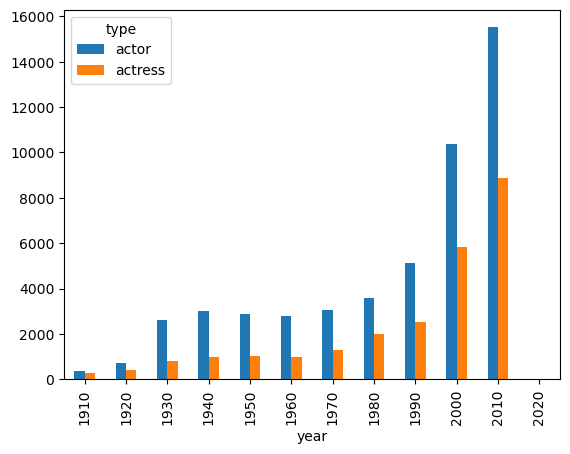

In [14]:
c_decade.unstack(0).plot(kind='bar')
plt.show()

## merge

동일한 유형의 다른 데이터 파일을 병합하는 것

In [22]:
release = pd.read_csv('./pythondsp-pandasguide-b936c3b43406/data/release_dates.csv',
                    index_col=None, encoding='utf-8')
release.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Declimax,2018,Netherlands,2018-01-21
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Horror,2015,USA,2015-11-20


* casts 파일에서 Amelia 를 필터링

In [23]:
c_amelia = casts[casts['title']=='Amelia']
c_amelia.head()

,title,year,name,type,character,n
5767,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0
23319,Amelia,2009,Jeremy Akerman,actor,Sheriff,19.0


* release 파일에서 개봉일을 알아본다.

In [25]:
release[release['title']=='Amelia'].head()

,title,year,country,date
20543,Amelia,1966,Mexico,1966-03-10
20544,Amelia,2009,Canada,2009-10-23
20545,Amelia,2009,USA,2009-10-23
20546,Amelia,2009,Australia,2009-11-12
20547,Amelia,2009,Singapore,2009-11-12


* 두개의 데이터 병합

In [26]:
c_amelia.merge(release).head()

,title,year,name,type,character,n,country,date
0,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Canada,2009-10-23
1,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,USA,2009-10-23
2,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Australia,2009-11-12
3,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Singapore,2009-11-12
4,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Ireland,2009-11-13


* name 이 Aaron Abrams인 항목 필터링

In [27]:
c = casts[casts['name']=='Aaron Abrams']
c.head(2)

,title,year,name,type,character,n
5765,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN
5766,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.0


* 제목과 년도를 기준으로 병합
* 병합하려면 영화 이름과 연도가 같아야한다

In [28]:
c.merge(casts, on=['title', 'year']).head()

,title,year,name_x,type_x,character_x,n_x,name_y,type_y,character_y,n_y
0,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN,Aaron Abrams,actor,Ralph Sinclair,NaN
1,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN,Christian Ackerman,actor,Simon,NaN
2,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.0,Graham Abbey,actor,Officer #2,8.0
3,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.0,Aaron Abrams,actor,Alex,4.0
4,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Aaron Abrams,actor,Slim Gordon,8.0


In [29]:
c_costar = c.merge(casts, on=['title', 'year'])
c_costar = c_costar[c_costar['name_y']!='Aaron Abrams']
c_costar.head()

,title,year,name_x,type_x,character_x,n_x,name_y,type_y,character_y,n_y
1,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN,Christian Ackerman,actor,Simon,NaN
2,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.0,Graham Abbey,actor,Officer #2,8.0
5,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Jeremy Akerman,actor,Sheriff,19.0
8,Cinderella Man,2005,Aaron Abrams,actor,1928 Fan,67.0,Nick Alachiotis,actor,Baer Cornerman,38.0
9,Cinderella Man,2005,Aaron Abrams,actor,1928 Fan,67.0,Nick Alachiotis,actor,Undercard Boxer - Feldman,38.0


## Index

데이터를 구성하가ㅗ 데이터에 대한 빠른 액세스를 가능하게한다.
%%timeit을 사용하여 작업에 필요한 시간을 비교할 수 있다.

In [32]:
import pandas as pd
cast = pd.read_csv('./pythondsp-pandasguide-b936c3b43406/data/cast.csv',
                    index_col=None, encoding='utf-8')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


* index 생성

In [33]:
%%time
# indexing없이 데이터 접근

cast[cast['title']=='Macbeth']

CPU times: user 14.3 ms, sys: 1.64 ms, total: 16 ms
Wall time: 16.9 ms


,title,year,name,type,character,n
12868,Macbeth,2015,Darren Adamson,actor,Soldier,NaN
22302,Macbeth,1916,Spottiswoode Aitken,actor,Duncan,4.0
25855,Macbeth,1948,Robert Alan,actor,Third Murderer,NaN
26990,Macbeth,2016,John Albasiny,actor,Doctor,NaN
38090,Macbeth,1948,William Alland,actor,Second Murderer,18.0
40639,Macbeth,1997,Stevie Allen,actor,Murderer,21.0
60543,Macbeth,2014,Moyo Akand?,actress,Witch,NaN
63776,Macbeth,1916,Mary Alden,actress,Lady Macduff,6.0


In [34]:
%%timeit

# indexing 없이 데이터 접근
cast[cast['title']=='Macbeth']

3.72 ms ± 23.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


* set index 를 통해 데이터에 대한 인덱스를 생성한다.

In [35]:
c = cast.set_index(['title'])
c.head(4)

,year,name,type,character,n
title,,,,,
Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
Suuri illusioni,1985,Homo $,actor,Guests,22.0
Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN


* 더 빠른 작업을 위해 .loc 를 사용

In [36]:
%%time

c.loc['Macbeth']

CPU times: user 16.3 ms, sys: 2.59 ms, total: 18.9 ms
Wall time: 21.5 ms


,year,name,type,character,n
title,,,,,
Macbeth,2015,Darren Adamson,actor,Soldier,NaN
Macbeth,1916,Spottiswoode Aitken,actor,Duncan,4.0
Macbeth,1948,Robert Alan,actor,Third Murderer,NaN
Macbeth,2016,John Albasiny,actor,Doctor,NaN
Macbeth,1948,William Alland,actor,Second Murderer,18.0
Macbeth,1997,Stevie Allen,actor,Murderer,21.0
Macbeth,2014,Moyo Akand?,actress,Witch,NaN
Macbeth,1916,Mary Alden,actress,Lady Macduff,6.0


In [37]:
%%timeit

c.loc['Macbeth']

1.08 ms ± 2.13 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


* 더 빠른 작업을 위해 인덱스를 정렬한다.

In [38]:
cs = cast.set_index(['title']).sort_index()
cs.tail(4)

,year,name,type,character,n
title,,,,,
xXx: Return of Xander Cage,2017,Julie Abcede,actor,Catwalk Partiers,84.0
xXx: Return of Xander Cage,2017,Jeimi Abila,actress,Lazarus' Girls,64.0
xXx: Return of Xander Cage,2017,Wayne Ambrose,actor,Choir Members,34.0
xXx: State of the Union,2005,Robert Alonzo,actor,Guard,NaN


In [39]:
%%time
cs.loc['Macbeth']

CPU times: user 20.3 ms, sys: 804 µs, total: 21.1 ms
Wall time: 22.7 ms


,year,name,type,character,n
title,,,,,
Macbeth,1948,William Alland,actor,Second Murderer,18.0
Macbeth,1916,Spottiswoode Aitken,actor,Duncan,4.0
Macbeth,1916,Mary Alden,actress,Lady Macduff,6.0
Macbeth,1997,Stevie Allen,actor,Murderer,21.0
Macbeth,1948,Robert Alan,actor,Third Murderer,NaN
Macbeth,2016,John Albasiny,actor,Doctor,NaN
Macbeth,2014,Moyo Akand?,actress,Witch,NaN
Macbeth,2015,Darren Adamson,actor,Soldier,NaN


In [40]:
%%timeit

cs.loc['Macbeth']

70 µs ± 392 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Multiple index

데이터에 여러 인덱스를 갖게 할 수 있다.

In [49]:
cm = cast.set_index(['title', 'n']).sort_index()
cm.tail(30)

year  \
title                                              n             
Zwei in einem Anzug                                2.0    1950   
Zwei in einem Auto                                 2.0    1951   
Zweimal zwei im Himmelbett                         1.0    1937   
Zwischen Lachen und Weinen                         NaN    1919   
Zwischen Pankow und Zehlendorf                     3.0    1991   
                                                   NaN    1991   
Zwischen Welten                                    2.0    2014   
Zwischen den Sternen                               2.0    2002   
Zwischen vierzehn und siebzehn - Sexualnot der ... 5.0    1929   
Zwischengleis                                      7.0    1978   
Zyat iz provintsii                                 NaN    1987   
                                                   NaN    1987   
Zzikhimyeon jukneunda                              3.0    2000   
bestefreunde                                       3.0    2014   
bwoy                                               NaN    2016   
eCupid                                             33.0   2011   
                                                   47.0   2011   
el Ziara                                           NaN    2014   
fl 19,99                                           NaN    1998   
                                                   NaN    1998   
iBoy                                               9.0    2017   
inter.m@tes                                        6.0    2004   
kingdom of ants                                    NaN    2016   
                                                   NaN    2016   
les aventures d'archives                           NaN    2016   
w Delta z                                          8.0    2007   
xXx: Return of Xander Cage                         34.0   2017   
                                                   64.0   2017   
                                                   84.0   2017   
xXx: State of the Union                            NaN    2005   

                                                                            name  \
title                                              n                               
Zwei in einem Anzug                                2.0         Wolf Albach-Retty   
Zwei in einem Auto                                 2.0         Wolf Albach-Retty   
Zweimal zwei im Himmelbett                         1.0           Georg Alexander   
Zwischen Lachen und Weinen                         NaN           Georg Alexander   
Zwischen Pankow und Zehlendorf                     3.0         Kathrin Ackermann   
                                                   NaN              Eugen Albert   
Zwischen Welten                                    2.0             Mohsin Ahmady   
Zwischen den Sternen                               2.0                Fatih Alas   
Zwischen vierzehn und siebzehn - Sexualnot der ... 5.0             Fritz Alberti   
Zwischengleis                                      7.0        Alexander Allerson   
Zyat iz provintsii                                 NaN       Dinmukhamet Akhimov   
                                                   NaN    Kalampyr Ajsangaliyeva   
Zzikhimyeon jukneunda                              3.0              Jae-hwan Ahn   
bestefreunde                                       3.0         Tina Amon Amonsen   
bwoy                                               NaN           Drew (IV) Allen   
eCupid                                             33.0         Christy Alvarado   
                                                   47.0               Shon Abram   
el Ziara                                           NaN           Manel Abdelkoui   
fl 19,99                                           NaN               Thomas Acda   
                                                   NaN             Marijke Aerts   
iBoy                                               9.0      Shaquille Ali-Yebuah   
inter.m@tes  

In [50]:
cm.loc['Macbeth']

,year,name,type,character
n,,,,
4.0,1916,Spottiswoode Aitken,actor,Duncan
6.0,1916,Mary Alden,actress,Lady Macduff
18.0,1948,William Alland,actor,Second Murderer
21.0,1997,Stevie Allen,actor,Murderer
NaN,2015,Darren Adamson,actor,Soldier
NaN,1948,Robert Alan,actor,Third Murderer
NaN,2016,John Albasiny,actor,Doctor
NaN,2014,Moyo Akand?,actress,Witch


In [51]:
cm.loc['Macbeth'].loc[4:18]

,year,name,type,character
n,,,,
4.0,1916,Spottiswoode Aitken,actor,Duncan
6.0,1916,Mary Alden,actress,Lady Macduff
18.0,1948,William Alland,actor,Second Murderer


In [52]:
cm.loc['Macbeth'].loc[4]

year                        1916
name         Spottiswoode Aitken
type                       actor
character                 Duncan
Name: 4.0, dtype: object

In [53]:
cm.head(2)

,,year,name,type,character
title,n,,,,
#1 Serial Killer,17.0,2013,Michael Alton,actor,Detective Roberts
#DigitalLivesMatter,NaN,2016,Rashan Ali,actress,News Reporter


### reset index

reset_index( ) 을 사용하여 인덱스를 제설정 할 수 있다.

In [54]:
cm = cm.reset_index('n')
cm.head(2)

,n,year,name,type,character
title,,,,,
#1 Serial Killer,17.0,2013,Michael Alton,actor,Detective Roberts
#DigitalLivesMatter,NaN,2016,Rashan Ali,actress,News Reporter


## CSV library

### read file

In [58]:
import csv
titles = list(csv.DictReader(open('./pythondsp-pandasguide-b936c3b43406/data/titles.csv')))
titles[0:5]

[{'title': 'The Rising Son', 'year': '1990'},
 {'title': 'The Thousand Plane Raid', 'year': '1969'},
 {'title': 'Crucea de piatra', 'year': '1993'},
 {'title': 'Country', 'year': '2000'},
 {'title': 'Gaiking II', 'year': '2011'}]

In [61]:
titles[-5:]

[{'title': 'Rebel', 'year': '1970'},
 {'title': 'Suzanne', 'year': '1996'},
 {'title': 'Bomba', 'year': '2013'},
 {'title': 'Aao Jao Ghar Tumhara', 'year': '1984'},
 {'title': 'Mrs. Munck', 'year': '1995'}]

* 별도의 행에 제목과 연도 표시

In [60]:
for k, v in titles[0].items():
    print(k, ':', v)

title : The Rising Son
year : 1990


### 연도에 따라 영화 표시

* 1985년의 모든 영화 표시

In [62]:
year85 = [a for a in titles if a['year']=='1985']
year85[:5]

[{'title': 'Insaaf Main Karoonga', 'year': '1985'},
 {'title': 'Vivre pour survivre', 'year': '1985'},
 {'title': 'Water', 'year': '1985'},
 {'title': 'Doea tanda mata', 'year': '1985'},
 {'title': 'Koritsia gia tsibima', 'year': '1985'}]

* 1990~1999년 영화표시

In [63]:
movies90 = [m for m in titles if (int(m['year'])<int('2000')) and (int(m['year'])>int('1989'))]
movies90[:5]

[{'title': 'The Rising Son', 'year': '1990'},
 {'title': 'Crucea de piatra', 'year': '1993'},
 {'title': 'Poka Makorer Ghar Bosoti', 'year': '1996'},
 {'title': 'Maa Durga Shakti', 'year': '1999'},
 {'title': 'Conflict of Interest', 'year': '1993'}]

* 모든 'Macbeth' 찾기

In [64]:
macbeth = [m for m in titles if m['title']=='Macbeth']
macbeth[:3]

[{'title': 'Macbeth', 'year': '1913'},
 {'title': 'Macbeth', 'year': '2006'},
 {'title': 'Macbeth', 'year': '2013'}]

### itemgetter

* 연도별로 영화 정렬

In [65]:
from operator import itemgetter
sorted(macbeth, key=itemgetter('year'))[:3]

[{'title': 'Macbeth', 'year': '1913'},
 {'title': 'Macbeth', 'year': '1997'},
 {'title': 'Macbeth', 'year': '1998'}]

### 공백 0으로 채우기

In [74]:
casts = list(csv.DictReader(open('./pythondsp-pandasguide-b936c3b43406/data/cast.csv')))

In [75]:
casts[3:5]

[{'title': 'Secret in Their Eyes',
  'year': '2015',
  'name': '$hutter',
  'type': 'actor',
  'character': '2002 Dodger Fan',
  'n': ''},
 {'title': 'Steve Jobs',
  'year': '2015',
  'name': '$hutter',
  'type': 'actor',
  'character': '1988 Opera House Patron',
  'n': ''}]

* 0으로 대체

In [76]:
cast0 = [{**c, 'n':c['n'].replace('', '0')} for c in casts]
cast0[3:5]

[{'title': 'Secret in Their Eyes',
  'year': '2015',
  'name': '$hutter',
  'type': 'actor',
  'character': '2002 Dodger Fan',
  'n': '0'},
 {'title': 'Steve Jobs',
  'year': '2015',
  'name': '$hutter',
  'type': 'actor',
  'character': '1988 Opera House Patron',
  'n': '0'}]

* Maa 로 시작하는 영화

In [77]:
maa = [m for m in titles if m['title'].startswith('Maa')]
maa[:3]

[{'title': 'Maa Durga Shakti', 'year': '1999'},
 {'title': 'Maarek hob', 'year': '2004'},
 {'title': 'Maa Aur Mamta', 'year': '1970'}]

### collections.counter

* 연도별로 영화계산

In [78]:
from collections import Counter

by_year = Counter(t['year']for t in titles)
by_year.most_common(3)

[('2016', 2363), ('2017', 2138), ('2015', 1849)]

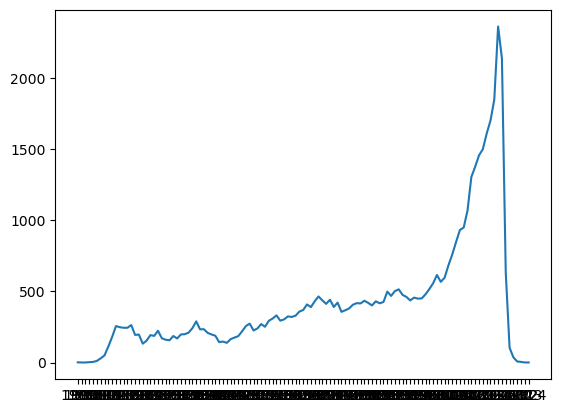

In [79]:
import matplotlib.pyplot as plt

data = by_year.most_common(len(titles))
data = sorted(data)
x = [c[0] for c in data]
y = [c[1] for c in data]
plt.plot(x, y)
plt.show()

### collections.defaultdict

* 연도별로 dictionary에 영화 추가

In [80]:
from collections import defaultdict

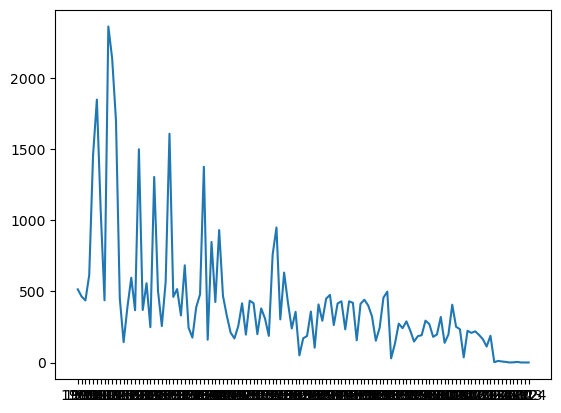

In [81]:
d = defaultdict(list)
for row in titles:
    d[row['year']].append(row['title'])
    
xx=[]
yy=[]
for k, v in d.items():
    xx.append(k)
    yy.append(len(v))

plt.plot(sorted(xx), yy)
plt.show()

In [82]:
xx[:5]

['1990', '1969', '1993', '2000', '2011']

In [83]:
yy[:5]

[515, 465, 437, 616, 1457]

* Aaron Abrams 의 모든 영화 보기

In [84]:
cf = [c for c in casts if c['name']=='Aaron Abrams']
cf[:3]

[{'title': '#FromJennifer',
  'year': '2017',
  'name': 'Aaron Abrams',
  'type': 'actor',
  'character': 'Ralph Sinclair',
  'n': ''},
 {'title': '388 Arletta Avenue',
  'year': '2011',
  'name': 'Aaron Abrams',
  'type': 'actor',
  'character': 'Alex',
  'n': '4'},
 {'title': 'Amelia',
  'year': '2009',
  'name': 'Aaron Abrams',
  'type': 'actor',
  'character': 'Slim Gordon',
  'n': '8'}]

In [85]:
dcf = defaultdict(list)
for row in cf:
    dcf[row['year']].append(row['title'])
    
dcf

defaultdict(list,
            {'2017': ['#FromJennifer', 'The Go-Getters'],
             '2011': ['388 Arletta Avenue',
              'Jesus Henry Christ',
              'Jesus Henry Christ',
              'Take This Waltz',
              'The Chicago 8'],
             '2009': ['Amelia', 'At Home by Myself... with You'],
             '2005': ['Cinderella Man', 'Sabah'],
             '2015': ['Closet Monster', 'Regression'],
             '2018': ['Code 8'],
             '2007': ['Firehouse Dog', 'Young People Fucking'],
             '2008': ['Flash of Genius'],
             '2013': ['It Was You Charlie'],
             '2004': ['Resident Evil: Apocalypse', 'Siblings'],
             '2003': ['The In-Laws', 'The Visual Bible: The Gospel of John'],
             '2006': ['Zoom']})